In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pywt

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [49]:
df = pd.read_csv("drive/MyDrive/ethusd.csv", sep='\t', parse_dates=["time"], index_col="time")

In [50]:
df.shape

(2413908, 5)

In [51]:
df.head(20)

,open,close,high,low,volume
time,,,,,
2017-02-01 02:09:00,10.692,10.692,10.692,10.692,5.885368
2017-02-01 02:10:00,10.692,10.692,10.692,10.692,89.014632
2017-02-01 02:22:00,10.706,10.706,10.706,10.706,9.421427
2017-02-01 02:32:00,10.708,10.708,10.708,10.708,31.454404
2017-02-01 02:34:00,10.677,10.677,10.677,10.677,1.520000
2017-02-01 02:39:00,10.733,10.734,10.734,10.733,82.983488
2017-02-01 02:52:00,10.739,10.740,10.740,10.739,10.079870
2017-02-01 03:00:00,10.740,10.740,10.740,10.740,296.638698
2017-02-01 03:01:00,10.713,10.713,10.713,10.713,1.820000


In [52]:
df = df.loc[~df.index.duplicated(), :]

Text(0.5, 1.0, 'Price of Litecoin')

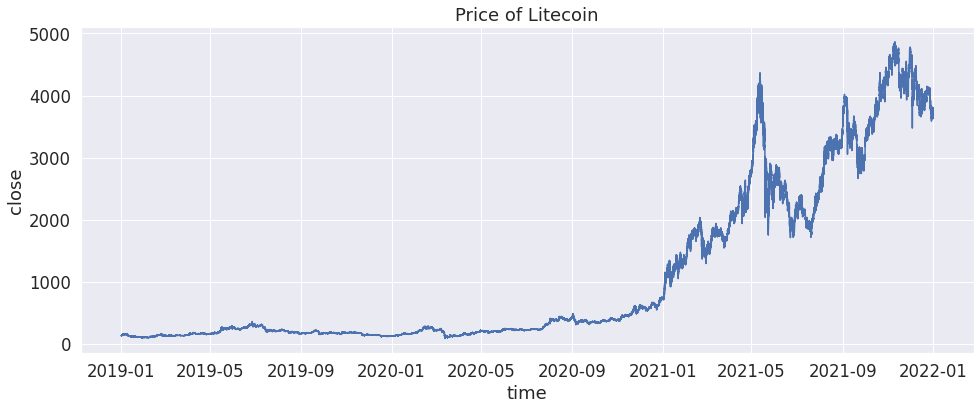

In [53]:

df = df[(df.index > '2019-01-01 00:00:00') & (df.index < '2022-01-01 00:00:00')]
df.shape

plt.figure(figsize=(16,6))
sns.lineplot(x=df.index, y="close", data=df).set_title("Price of Litecoin")

In [54]:
wavelet = pywt.Wavelet('bior3.1')
coeffs = pywt.wavedec(df['close'], wavelet, level=2)

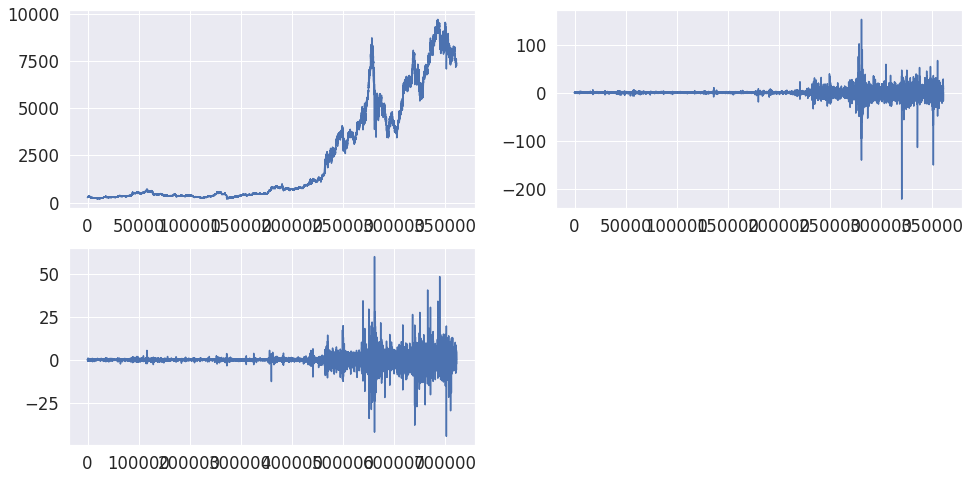

In [55]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.plot(coeffs[0])
plt.subplot(222)
plt.plot(coeffs[1])
plt.subplot(223)
plt.plot(coeffs[2])

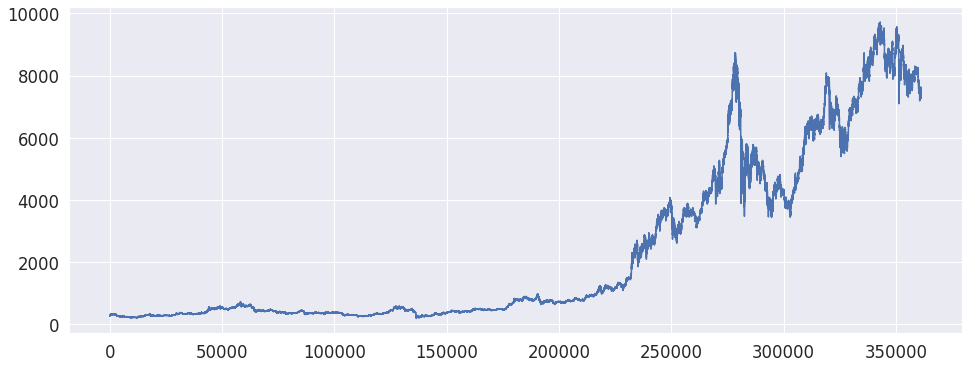

In [56]:
plt.figure(figsize=(16, 6))
plt.plot(coeffs[0])

In [57]:
for j in range(1, len(coeffs)):
  coeffs[j] *= 0

tendencia_estimada = list(pywt.waverec(coeffs, wavelet))

In [58]:
df['new_close'] = tendencia_estimada

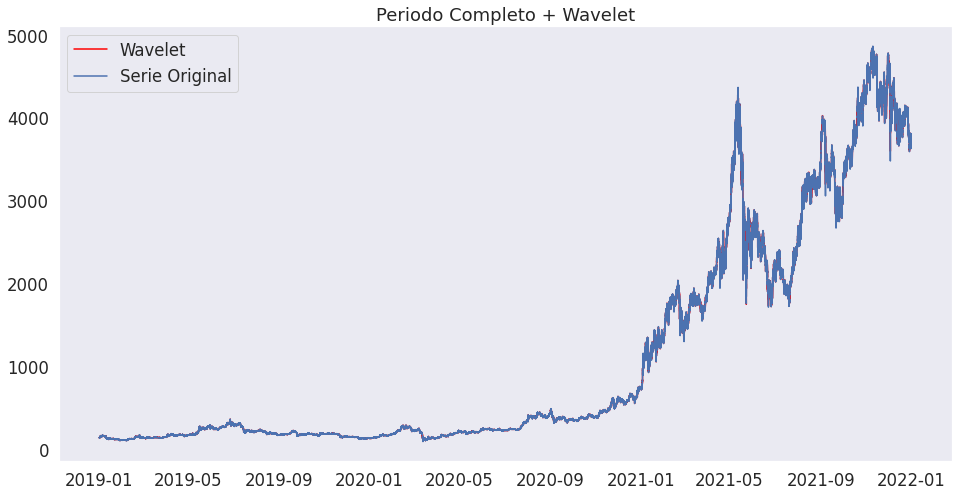

In [76]:
plt.figure(figsize=(16,8))
plt.plot(df['new_close'], label="Wavelet", color='red')
plt.plot(df['close'], label="Serie Original")
plt.title("Periodo Completo + Wavelet")
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Janela Selecionada')

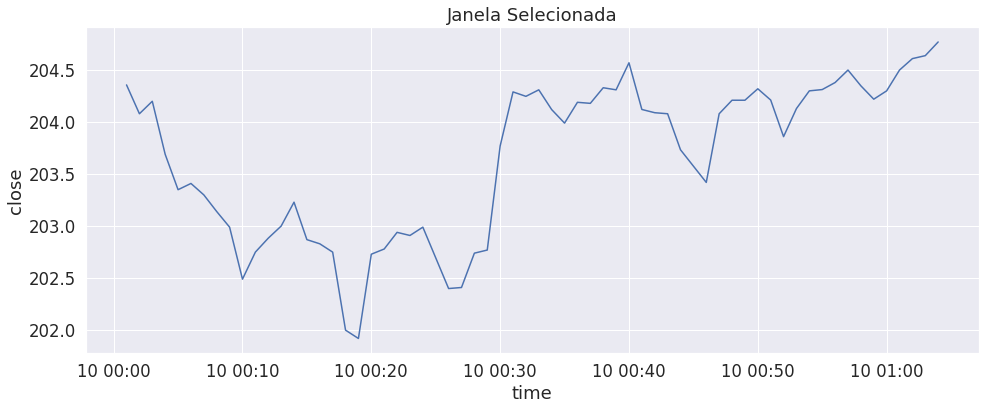

In [73]:
df_period = df[(df.index > '2020-03-10 00:00:00') & (df.index < '2020-03-10 01:05:00')]
df_period.shape

plt.figure(figsize=(16,6))
sns.lineplot(x=df_period.index, y="close", data=df_period).set_title("Janela Selecionada")

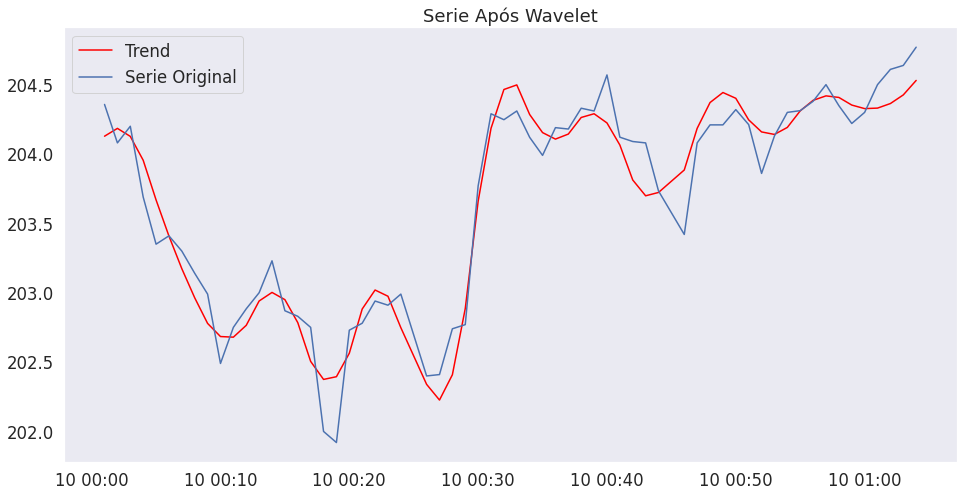

In [74]:
plt.figure(figsize=(16,8))
plt.plot(df_period['new_close'], label="Trend", color='red')
plt.plot(df_period['close'], label="Serie Original")
plt.title("Serie Após Wavelet")
plt.legend()
plt.grid()
plt.show()

In [62]:
def train_test_split(df, test_size=0.2):
  split_row = len(df) - int(test_size * len(df))
  train_data = df.iloc[:split_row]
  test_data = df.iloc[split_row:]
  return train_data, test_data

In [63]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 8))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Preço [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [64]:
train, test = train_test_split(df, test_size=0.2)

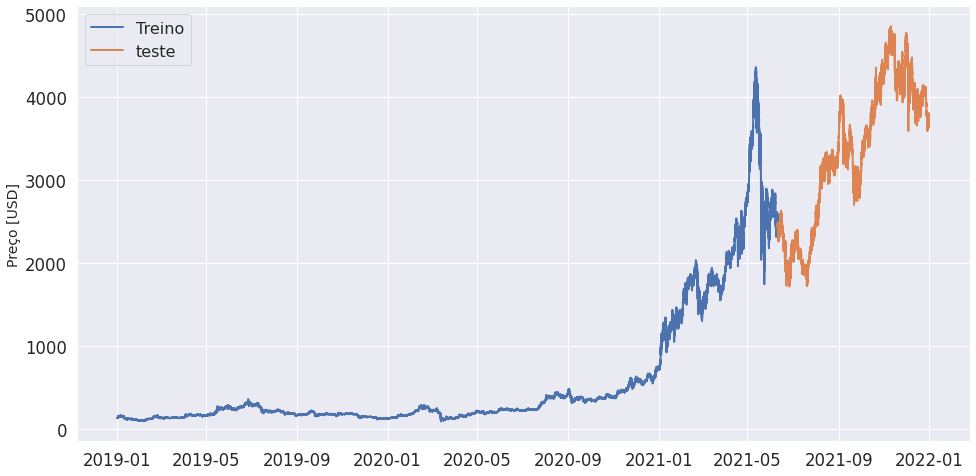

In [68]:
line_plot(train['new_close'], test['new_close'], 'Treino', 'teste')

In [72]:
df.iloc[0] - 1

open         135.000000
close        134.960000
high         135.000000
low          134.940000
volume        85.733734
new_close    135.002969
Name: 2019-01-01 00:01:00, dtype: float64